In [26]:
#utilities
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#model building
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [27]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [28]:
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [29]:
matches.shape,deliveries.shape


((1095, 20), (260920, 17))

In [30]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [31]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [32]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [33]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [34]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [35]:
matches['result'].unique()

array(['runs', 'wickets', 'tie', 'no result'], dtype=object)

In [36]:
deliveries.isnull().sum()


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [37]:
import pandas as pd

# Step 1: Load the dataset
matches = pd.read_csv('matches.csv')

# Step 2: Create new columns with default 0
matches['win_by_runs'] = 0
matches['win_by_wickets'] = 0

# Step 3: Fill based on 'result' and 'result_margin'
matches.loc[matches['result'] == 'runs', 'win_by_runs'] = matches['result_margin']
matches.loc[matches['result'] == 'wickets', 'win_by_wickets'] = matches['result_margin']

# Step 4: Replace 'runs' and 'wickets' with 'normal'
matches['result'] = matches['result'].replace({'runs': 'normal', 'wickets': 'normal'})

# Step 5: (Optional but good) Drop the original 'result_margin' column
matches.drop('result_margin', axis=1, inplace=True)

# Step 6: Save it back to CSV permanently
matches.to_csv('matches.csv', index=False)



# This line says:
# “For all the rows in the matches DataFrame where the result is 'runs', set the value of the win_by_runs column equal to the value in the result_margin column.”

# 🔬 How it works:
# matches['result'] == 'runs':
# → This creates a boolean mask (True/False values) where it's True if the match was won by runs.

# matches.loc[condition, 'column']:
# → The .loc[] function allows you to select specific rows and specific columns based on a condition. → In this case, you're selecting rows where the result is 'runs', and the column is 'win_by_runs'.

# = matches['result_margin']:
# → You’re assigning the corresponding values from result_margin to the win_by_runs column only for those selected rows.


In [38]:
matches['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [39]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'target_runs', 'target_overs', 'super_over', 'method',
       'umpire1', 'umpire2', 'win_by_runs', 'win_by_wickets'],
      dtype='object')

In [40]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,target_runs,target_overs,super_over,method,umpire1,umpire2,win_by_runs,win_by_wickets
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,normal,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,140,0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,normal,241.0,20.0,N,NaN,MR Benson,SL Shastri,33,0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,normal,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,0,9
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,normal,166.0,20.0,N,NaN,SJ Davis,DJ Harper,0,5
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,normal,111.0,20.0,N,NaN,BF Bowden,K Hariharan,0,5


In [41]:
# Load the dataset
matches = pd.read_csv('matches.csv')

# Step 1: Create 'dl_applied' based on 'method' column
matches['dl_applied'] = matches['method'].apply(lambda x: 1 if x == 'D/L' else 0)

# Step 2: Drop the old 'method' column
matches.drop('method', axis=1, inplace=True)

# Step 3: Convert 'super_over' from 'Y'/'N' to 1/0
matches['super_over'] = matches['super_over'].map({'Y': 1, 'N': 0})

# Step 4: Rename 'super_over' to 'is_super_over'
matches.rename(columns={'super_over': 'is_super_over'}, inplace=True)

# Step 5: Save changes permanently to CSV
matches.to_csv('matches.csv', index=False)


In [42]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,target_runs,target_overs,is_super_over,umpire1,umpire2,win_by_runs,win_by_wickets,dl_applied
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,normal,223.0,20.0,0,Asad Rauf,RE Koertzen,140,0,0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,normal,241.0,20.0,0,MR Benson,SL Shastri,33,0,0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,normal,130.0,20.0,0,Aleem Dar,GA Pratapkumar,0,9,0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,normal,166.0,20.0,0,SJ Davis,DJ Harper,0,5,0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,normal,111.0,20.0,0,BF Bowden,K Hariharan,0,5,0


In [43]:
#creating a list of columns and removing unnecessary columns from the list
list1 = matches.columns.to_list()
remove_from_list = ['id', 'date', 'toss_winner', 'toss_decision', 'winner', 
                    'win_by_runs', 'player_of_match', 'venue',
                    'umpire1', 'umpire2']

for i in range(len(remove_from_list)):
    list1.remove(remove_from_list[i])
    
for i in list1:
    print('The unique values in', i, 'are: ', matches[i].unique())

The unique values in season are:  ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']
The unique values in city are:  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali']
The unique values in match_type are:  ['League' 'Semi Final' 'Final' '3rd Place Play-Off' 'Qualifier 1'
 'Elimination Final' 'Qualifier 2' 'Eliminator']
The unique values in team1 are:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' '

In [44]:
# Load the dataset
deliveries = pd.read_csv('deliveries.csv')

# Step 4: Rename 'batter' to 'batsman'
deliveries.rename(columns={'batter': 'batsman'}, inplace=True)

# Step 5: Save changes permanently to CSV
deliveries.to_csv('deliveries.csv', index=False)

In [45]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [46]:
deliveries["extras_type"].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [47]:
deliveries["inning"].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [48]:
deliveries["extras_type"].nunique()

5

In [49]:
list2 = deliveries.columns.to_list()
remove_from_list2 = ['match_id', 'batsman','inning', 'non_striker', 
                     'bowler', 'player_dismissed', 'fielder']

for i in range(len(remove_from_list2)):
    list2.remove(remove_from_list2[i])
for i in list2:
    print('The unique values in', i, 'are: ', deliveries[i].unique())

The unique values in batting_team are:  ['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals' 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']
The unique values in bowling_team are:  ['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings' 'Delhi Daredevils' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Royal Challengers Bengaluru']
The unique values in over are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
The unique values

In [50]:
# grouping the 1st innings,2nd innings score in a particular matchid
# lets say match id = 1,so inning 1 score = 207,inning 2 score = 172

totalrun_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

totalrun_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [51]:
#capturing only the first innings, because we will be predicting the second innings
#Also we are changing total runs into targets by using the lambda function

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)#to get target
totalrun_df

C:\Users\Nishith\AppData\Local\Temp\ipykernel_13584\2684034329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)#to get target


,match_id,inning,total_runs
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
2207,1426307,1,215
2209,1426309,1,160
2211,1426310,1,173
2213,1426311,1,176


In [52]:
# Merging 2 data frames

match_df = matches.merge(totalrun_df[['match_id','total_runs']],
                       left_on='id',right_on='match_id')

match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_runs,target_overs,is_super_over,umpire1,umpire2,win_by_runs,win_by_wickets,dl_applied,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,223.0,20.0,0,Asad Rauf,RE Koertzen,140,0,0,335982,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,241.0,20.0,0,MR Benson,SL Shastri,33,0,0,335983,241
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,130.0,20.0,0,Aleem Dar,GA Pratapkumar,0,9,0,335984,130
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,166.0,20.0,0,SJ Davis,DJ Harper,0,5,0,335985,166
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,111.0,20.0,0,BF Bowden,K Hariharan,0,5,0,335986,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,215.0,20.0,0,Nitin Menon,VK Sharma,0,4,0,1426307,215
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,160.0,20.0,0,AK Chaudhary,R Pandit,0,8,0,1426309,160
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,173.0,20.0,0,KN Ananthapadmanabhan,MV Saidharshan Kumar,0,4,0,1426310,173
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,176.0,20.0,0,Nitin Menon,VK Sharma,36,0,0,1426311,176


In [53]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  target_runs      1092 non-null   float64
 14  target_overs     1092 non-null   float64
 15  is_super_over    1095 non-null   int64  
 16  umpire1          1095 non-null   object 
 17  umpire2       

In [54]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [55]:
# Now we will only keep the most frequent and common teams, which include:



teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangaluru',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Lucknow Super Giants', 
    'Gujarat Titans',
    'Delhi Capitals'
]

In [95]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

In [56]:
# replacing the Delhi Daredevils with Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

# replacing the Deccan Chargers with Sunrises Hyderabad

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

# replacing the Kings XI Punjab with Punjab Kings

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

# replacing the Royal Challengers Bangalore with Royal Challengers Bangaluru

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bangalore','Royal Challengers Bangaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bangaluru')



In [57]:
# considering only frequently occurring teams,
# which are mentioned in the team's list

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

match_df['team1'].unique() #again checking unique team names from match_df

array(['Royal Challengers Bangaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [58]:
# checking the matches which resulted in the DL method

match_df[match_df['dl_applied']==1].style.background_gradient(cmap = 'plasma')

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,target_runs,target_overs,is_super_over,umpire1,umpire2,win_by_runs,win_by_wickets,dl_applied,match_id,total_runs
38,336022,2007/08,Delhi,2008-05-17,League,DPMD Jayawardene,Feroz Shah Kotla,Delhi Capitals,Punjab Kings,Delhi Daredevils,bat,Kings XI Punjab,normal,89.000000,8.000000,0,AV Jayaprakash,RE Koertzen,6,0,1,336022,119
41,336025,2007/08,Kolkata,2008-05-18,League,M Ntini,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,normal,53.000000,8.000000,0,Asad Rauf,K Hariharan,3,0,1,336025,150
60,392183,2009,Cape Town,2009-04-19,League,DL Vettori,Newlands,Delhi Capitals,Punjab Kings,Delhi Daredevils,field,Delhi Daredevils,normal,54.000000,6.000000,0,MR Benson,SD Ranade,0,10,1,392183,105
63,392186,2009,Durban,2009-04-21,League,CH Gayle,Kingsmead,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,normal,69.000000,9.200000,0,DJ Harper,SD Ranade,11,0,1,392186,159
89,392214,2009,Centurion,2009-05-07,League,ML Hayden,SuperSport Park,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat,Chennai Super Kings,normal,187.000000,18.000000,0,DJ Harper,TH Wijewardene,12,0,1,392214,186
221,501245,2011,Kolkata,2011-05-07,League,Iqbal Abdulla,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,normal,52.000000,10.000000,0,Asad Rauf,PR Reiffel,10,0,1,501245,115
231,501255,2011,Bangalore,2011-05-14,League,CH Gayle,M Chinnaswamy Stadium,Royal Challengers Bangaluru,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,normal,102.000000,13.000000,0,RE Koertzen,RB Tiffin,0,4,1,501255,90
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Feroz Shah Kotla,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,normal,43.000000,5.000000,0,RM Deshpande,BNJ Oxenford,0,8,1,733993,144
476,829743,2015,Visakhapatnam,2015-04-22,League,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,normal,118.000000,12.000000,0,RK Illingworth,VA Kulkarni,16,0,1,829743,177
508,829807,2015,Hyderabad,2015-05-15,League,V Kohli,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangaluru,Sunrisers Hyderabad,bat,Royal Challengers Bangalore,normal,81.000000,6.000000,0,AK Chaudhary,HDPK Dharmasena,0,6,1,829807,136


In [59]:
# ignoring the rows which were Duckworth lewis system

match_df = match_df[match_df['dl_applied']==0]

# considering the match_id, city, winner, and total runs

match_df = match_df[['match_id','city','winner','total_runs']]

match_df

,match_id,city,winner,total_runs
0,335982,Bangalore,Kolkata Knight Riders,223
1,335983,Chandigarh,Chennai Super Kings,241
2,335984,Delhi,Delhi Daredevils,130
3,335985,Mumbai,Royal Challengers Bangalore,166
4,335986,Kolkata,Kolkata Knight Riders,111
...,...,...,...,...
1088,1426305,Mumbai,Lucknow Super Giants,215
1090,1426307,Hyderabad,Sunrisers Hyderabad,215
1091,1426309,Ahmedabad,Kolkata Knight Riders,160
1093,1426311,Chennai,Sunrisers Hyderabad,176


In [60]:
# Merging match_df with deliveries on match_id

# The reason for merging the “match_df” DataFrame with the “deliveries” DataFrame is to keep track of the current score and the score the team needs to achieve to win the match. While the “match_df” DataFrame provides information on the target score (total_runs), the “deliveries” DataFrame contains details of every ball bowled in the match and the runs scored in each ball.

# By merging these two DataFrames, we can get a comprehensive view of the match’s progress, including the current score, the target score, and other relevant information we need to analyze the game’s performance.

#merging matchdf with deliveries on match_id

delivery_df = match_df.merge(deliveries,on='match_id')

delivery_df.head(12)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


In [61]:
# Now let’s check the different columns present in our delivery_df:

delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [62]:
delivery_df.shape

(227363, 20)

In [63]:
# to get the current score of a particular match

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

delivery_df.head(15)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
0,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,...,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,1
1,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1
2,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,...,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2
3,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2
4,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2
5,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2
6,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,...,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN,3
7,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,3
8,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,...,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN,7
9,335982,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,...,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN,11


In [64]:
# creating column for runs left 

delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

delivery_df[['total_runs_x', 'current_score', 'runs_left']].head()

,total_runs_x,current_score,runs_left
0,223,1,222
1,223,1,222
2,223,2,221
3,223,2,221
4,223,2,221


In [65]:
# creating a column for balls left

delivery_df['balls_left'] = 120-(delivery_df['over']*6+delivery_df['ball'])

delivery_df[['over', 'ball', 'balls_left']].head(5)


,over,ball,balls_left
0,0,1,119
1,0,2,118
2,0,3,117
3,0,4,116
4,0,5,115


In [66]:
delivery_df['player_dismissed']


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
227358    NaN
227359    NaN
227360    NaN
227361    NaN
227362    NaN
Name: player_dismissed, Length: 227363, dtype: object

In [67]:
# filling nan values with "0"

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else it's 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x
                                                                      if x=="0" else "1")

# converting string to int

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')


delivery_df['player_dismissed'].unique()

array([0, 1])

In [68]:
# creating a column named wickets left

wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values

delivery_df['wickets_left'] = 10-wickets

In [69]:
# current RunRate
# It is a common practice to express run rates in cricket which means to 
#express it in runs per over, 
# so the score is multiplied by 6.

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

# required Run-Rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])

#Current Run-Rate
delivery_df[['cur_run_rate', 'req_run_rate']].head(10)


,cur_run_rate,req_run_rate
0,6.000000,11.193277
1,3.000000,11.288136
2,4.000000,11.333333
3,3.000000,11.431034
4,2.400000,11.530435
5,2.000000,11.631579
6,2.571429,11.681416
7,2.571429,11.681416
8,5.250000,11.571429
9,7.333333,11.459459


In [70]:
# def resultofmatch(row):
    
#     return 1 if row['batting_team'] == row['winner'] else 0
    
# delivery_df['result'] = delivery_df.apply(resultofmatch,axis=1)

# We have created a function named ‘resultofmatch’ that takes in a row of a DataFrame and returns 1 if the team that batted first is the winner, else it returns 0.

In [71]:
# sns.countplot(delivery_df['result'])

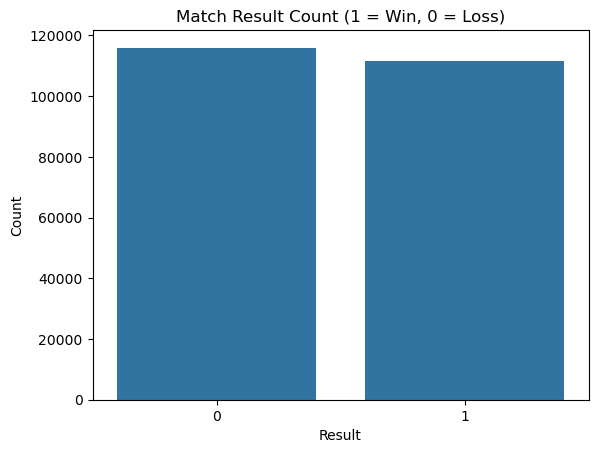

In [72]:
# The above code is taking too much long time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming delivery_df already exists and has both 'batting_team' and 'winner' columns

# Step 1: Create 'result' column efficiently (1 if batting_team == winner else 0)
delivery_df['result'] = (delivery_df['batting_team'] == delivery_df['winner']).astype(int)

# Step 2: Plot the countplot for result
sns.countplot(x='result', data=delivery_df)
plt.title("Match Result Count (1 = Win, 0 = Loss)")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()


In [73]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets_left','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]
                        
                        ##we are taking only important columns 

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,6.0,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,3.0,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,4.0,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,3.0,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,2.4,11.530435,1


In [77]:
final_df.shape


(227363, 10)

In [78]:
final_df.isnull().sum()


batting_team        0
bowling_team        0
city            12397
runs_left           0
balls_left          0
wickets_left        0
total_runs_x        0
cur_run_rate        0
req_run_rate        0
result              0
dtype: int64

In [79]:
# dropping of null values

final_df = final_df.dropna()

final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [80]:
final_df = final_df[final_df['balls_left'] != 0]

# We’re removing all the rows where the number of remaining balls is 0, which indicates that the match has ended.

# We’re doing it because it allows us to focus only on the part of the match that is still in progress and exclude the completed matches. The resulting DataFrame contains only the data from the ongoing matches, which can be further analyzed to make predictions about the outcome.

In [81]:
data = final_df.copy()

test = data['result']

train = data.drop(['result'],axis = 1)

train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,6.0,11.193277
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,3.0,11.288136
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,4.0,11.333333
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,3.0,11.431034
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,2.4,11.530435


In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((171011, 9), (42753, 9))

In [83]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [84]:
# batting team, bowling team, and city are categorical columns
# they will be converted to numeric using a one-hot encoder

cf = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [85]:
# Implementing Logistic Regression Model

# creating the pipeline

# lr = LogisticRegression(solver='liblinear')
pipe = Pipeline(steps=[
    ('step1', cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

# fitting the training data

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [86]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5970575164315954


In [89]:
# Now let’s check the performance of our logistic regression model on test data:

pipe.predict_proba(X_test)[10]

array([0.58748593, 0.41251407])

In [90]:
# Implementing Random Forest Classifier

# rf = RandomForestClassifier()
pipe2 = Pipeline(steps=[
    ('step1', cf),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

0.9986199798844525


In [93]:
# Let’s check the performance of the random forest classifier on test data:

pipe2.predict_proba(X_test)[8]

array([0., 1.])

In [94]:
# saving the logistic regression model
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))